# Prostate, Lung, Colorectal, and Ovarian Cancer Screening Trial (PLCO)

The Prostate, Lung, Colorectal, and Ovarian (PLCO) Cancer Screening Trial is a large randomized trial designed and sponsored by the National Cancer Institute (NCI) to determine the chance of getting PLCO cancer. The screening component of the trial was completed in 2006. Participants are being followed and additional data will be collected through 2015. In this assignment, you work on a subset of the dataset, for 216 patients, labeled as ('C') cancer and ('N') No cancer, with 4000 features (info related to gene, blood, etc.)

## Part A

Do a PCA and find the first two Principal Components (PC1 and PC2). Plot PC1-PC2 for these 216 patients.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import the data
cancerdata =pd.read_csv('Cancer.csv')

cancerdata.head()

,0.063915,0.033242,0.018484,0.0086177,0.035629,0.037925,0.028865,0.061731,0.0631,0.024787,...,0.021515,0.017385,0.018564,0.010027,0.012907,0.023405,0.038839,0.038151,0.032085,C
0,0.025409,0.051085,0.056305,0.021738,0.027410,0.014914,0.022455,0.023957,0.060527,0.047382,...,0.055033,0.080864,0.053423,0.051942,0.013187,0.028573,0.020427,0.023261,0.019975,C
1,0.025536,0.036123,0.054195,0.009735,0.027521,0.052255,0.042812,0.069087,0.069873,0.066629,...,0.033783,0.029022,0.046397,0.033288,0.041889,0.019256,-0.009447,0.021481,0.025569,C
2,0.012817,0.029652,0.079290,0.050677,0.039737,0.057713,0.044492,0.034581,0.042587,0.034147,...,0.036083,0.038598,0.048881,0.025569,0.026710,0.025122,0.047466,0.046706,0.043482,C
3,0.019846,-0.010577,-0.007504,0.019042,0.068786,0.061764,0.039036,0.020445,0.025988,0.066716,...,0.032044,0.026320,0.072016,0.070145,0.055744,0.051084,0.036683,0.043729,0.040289,C
4,0.039048,0.039355,0.001343,0.026221,0.044091,0.043953,0.039629,0.047926,0.046892,0.030589,...,0.065494,0.030681,0.039686,0.037256,0.022888,0.056221,0.055819,0.010087,0.006004,C


In [7]:
# Separate the inputs and outputs on the data
X = cancerdata.iloc[:, 1:4000].values
y = cancerdata.iloc[:, -1].values

print(X)

[[ 0.051085   0.056305   0.021738  ...  0.020427   0.023261   0.019975 ]
 [ 0.036123   0.054195   0.009735  ... -0.0094466  0.021481   0.025569 ]
 [ 0.029652   0.07929    0.050677  ...  0.047466   0.046706   0.043482 ]
 ...
 [ 0.021331   0.01621    0.012324  ...  0.0082736  0.004742   0.024756 ]
 [ 0.023266   0.0045561  0.024095  ...  0.010033   0.017391   0.031537 ]
 [ 0.027021   0.015273   0.026199  ...  0.026642   0.027718   0.040418 ]]


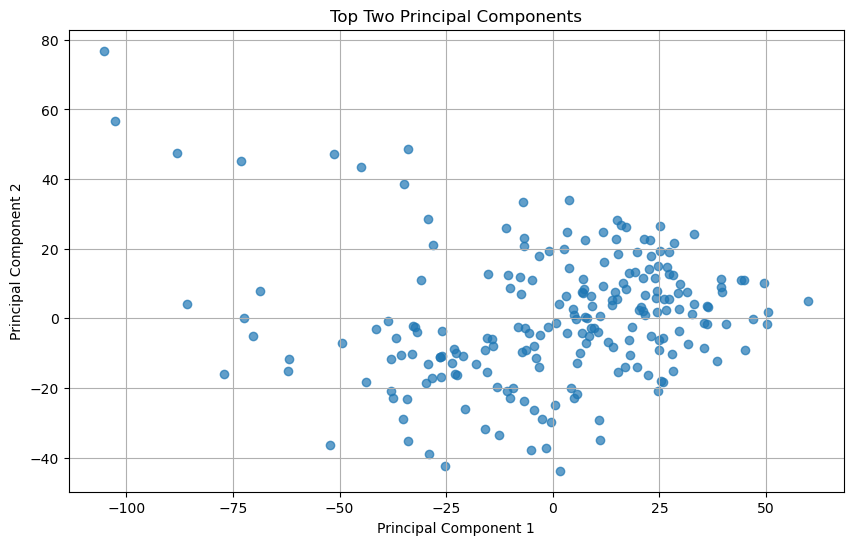

Explained variance by PC1: 0.22
Explained variance by PC2: 0.09
Total variance explained by top two components: 0.31


In [23]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming the dataset has features but no target column
# If you have a target, you can drop it here (e.g., `data = data.drop('target_column', axis=1)`)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA and select the top two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame to store the results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Plot the top two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Top Two Principal Components')
plt.grid()
plt.show()

# Print explained variance ratio for the top two components
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance_ratio[0]:.2f}")
print(f"Explained variance by PC2: {explained_variance_ratio[1]:.2f}")
print(f"Total variance explained by top two components: {np.sum(explained_variance_ratio):.2f}")


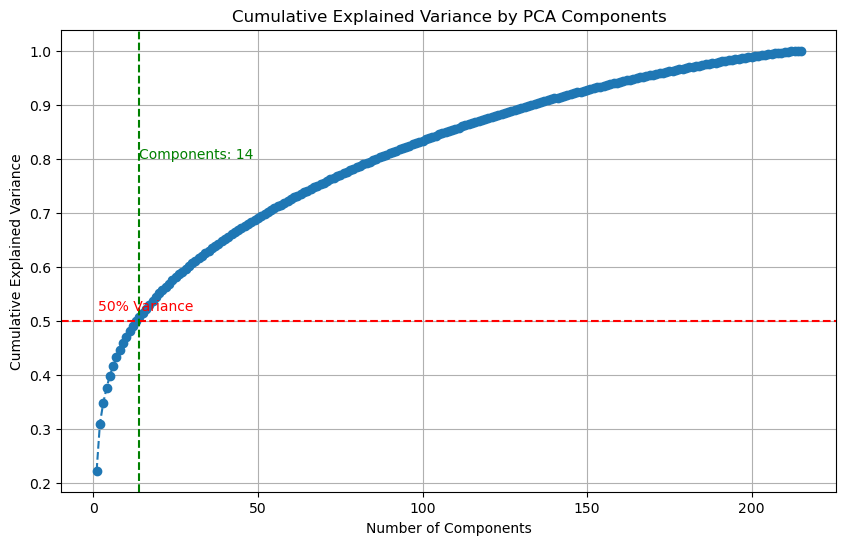

Number of components retained to achieve 50% variance: 14
Proportion of variance represented by the first two components: 0.31


In [19]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Fit PCA again to get explained variance ratio
pca = PCA()
pca.fit(X_scaled)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 
         marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.50, color='r', linestyle='--')  # Line for 95% variance
plt.axvline(x=np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.50) + 1, color='g', linestyle='--')  # Line for the number of components needed for 95%
plt.text(1.5, 0.52, '50% Variance', color='red')
plt.text(np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.50) + 1, 0.8, f'Components: {np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.50) + 1}', color='green')
plt.grid()
plt.show()

# Print the number of components used in PCA
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.50) + 1
print(f"Number of components retained to achieve 50% variance: {n_components}")

# Calculate the explained variance of the first two components
explained_variance_first_two = np.sum(pca.explained_variance_ratio_[:2])
print(f"Proportion of variance represented by the first two components: {explained_variance_first_two:.2f}")


## Part B 
Check how much information will preserve if we only use the first 10 principal components (in other words, calculate the percentage of information we describe if instead of using all 4000 variables, we use the first 10 PCs).

In [20]:
# Calculate the explained variance of the first two components
explained_variance_first_ten = np.sum(pca.explained_variance_ratio_[:10])
print(f"Proportion of variance represented by the first ten components: {explained_variance_first_ten:.2f}")

Proportion of variance represented by the first ten components: 0.47


## Part C
Build an ANN classifier for this dataset with these new 10 variables (the first 10 PCs), and evaluate your model accuracy.

In [21]:
# Encode output 
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # Assuming y contains 'C' and 'N' values

In [ ]:
# Standardize the data (important for PCA)
scaler = StandardScaler()
X_PCA10 = scaler.fit_transform(X)

# Initialize PCA
pca10 = PCA(n_components=2)  # Adjust the number of components as needed

# Fit PCA on the scaled data
X_pca10 = pca10.fit_transform(X_PCA10)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import callbacks

